# ***TRABAJO PRACTICO- REDES NEURONALES***




#Apellido, Nombre, DNI, email de todos los integrantes del grupo
Bahl,Martin,44208195,bahlmartinexactas@gmail.com
Ejarque,Leonel- 30368892-leonelejarque14@gmail.com

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año.Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

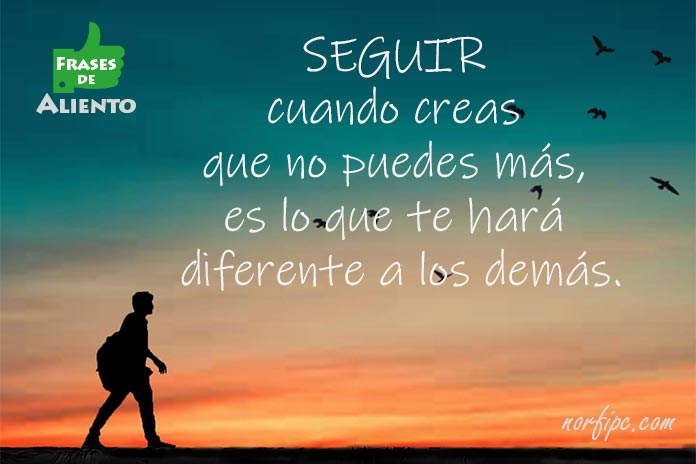

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime, timedelta

In [ ]:
data = pd.read_csv("/content/registro_temperatura365-ordenado-y-separado.csv")
df=pd.DataFrame(data)


In [ ]:
df["NOMBRE"] = df["NOMBRE"].str.strip().astype(str)
df2 = df[(df["NOMBRE"] == "AEROPARQUE AERO")]
df['TMAX']= pd.to_numeric(df2['TMAX'], errors="coerce")
df['TMIN']= pd.to_numeric(df2['TMIN'], errors="coerce")
df['TMAX'] = df2['TMAX'].astype(float)
df['TMIN'] = df2['TMIN'].astype(float)
df["TPROMEDIO"] = (df.TMAX + df.TMIN)/2

print(len(df2))

365


In [ ]:
cantidad_de_fechas = len(df2)
fecha_inicio = datetime(2023, 1, 1)
fecha_fin = datetime(2023, 12, 31)
fechas_aleatorias = [fecha_inicio + timedelta(days=random.randint(0, (fecha_fin - fecha_inicio).days)) for _ in range(cantidad_de_fechas)]
print(len(fechas_aleatorias))
# Ordena las fechas aleatorias en orden ascendente
fechas_aleatorias.sort()

# Reemplaza la columna de fecha en el DataFrame
df2["Fecha"] = fechas_aleatorias

# Ordena el DataFrame por la columna de fecha en orden ascendente
df2 = df2.sort_values(by="Fecha")

# Imprime el DataFrame ordenado
df2

365


<ipython-input-32-9d80d05622d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Fecha"] = fechas_aleatorias


,TMAX,TMIN,NOMBRE,TPROMEDIO,Fecha
0,23.0,17.9,AEROPARQUE AERO,20.45,2023-01-03
75,21.3,13.2,AEROPARQUE AERO,17.25,2023-01-05
74,25.5,16.4,AEROPARQUE AERO,20.95,2023-01-06
73,18.6,14.1,AEROPARQUE AERO,16.35,2023-01-07
72,17.2,12.2,AEROPARQUE AERO,14.70,2023-01-08
...,...,...,...,...,...
358,23.1,15.8,AEROPARQUE AERO,19.45,2023-12-26
362,19.9,9.3,AEROPARQUE AERO,14.60,2023-12-28
364,22.2,11.4,AEROPARQUE AERO,16.80,2023-12-30
363,17.0,7.8,AEROPARQUE AERO,12.40,2023-12-30


In [ ]:
# Graficamos

# Datos para el gráfico
y = df2['TPROMEDIO']
x = df2['Fecha']

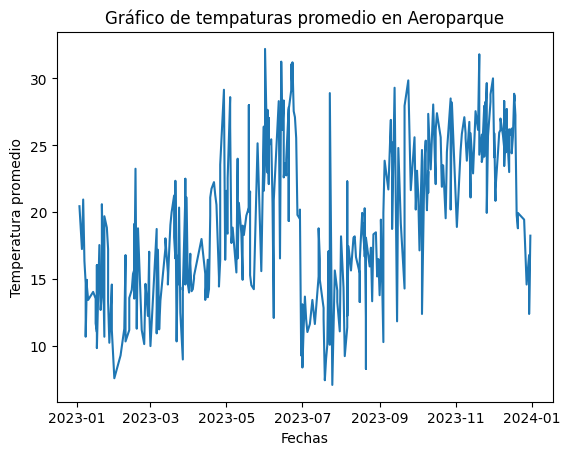

In [ ]:
# Crear el gráfico de línea
plt.plot(x, y)

# Agregar etiquetas y título
plt.xlabel('Fechas')
plt.ylabel('Temperatura promedio')
plt.title('Gráfico de tempaturas promedio en Aeroparque')

# Mostrar el gráfico
plt.show()

     TMAX  TMIN           NOMBRE  TPROMEDIO      Fecha  TMAX_TMIN
0    23.0  17.9  AEROPARQUE AERO      20.45 2023-01-03  23.0-17.9
75   21.3  13.2  AEROPARQUE AERO      17.25 2023-01-05  21.3-13.2
74   25.5  16.4  AEROPARQUE AERO      20.95 2023-01-06  25.5-16.4
73   18.6  14.1  AEROPARQUE AERO      16.35 2023-01-07  18.6-14.1
72   17.2  12.2  AEROPARQUE AERO      14.70 2023-01-08  17.2-12.2
..    ...   ...              ...        ...        ...        ...
358  23.1  15.8  AEROPARQUE AERO      19.45 2023-12-26  23.1-15.8
362  19.9   9.3  AEROPARQUE AERO      14.60 2023-12-28   19.9-9.3
364  22.2  11.4  AEROPARQUE AERO      16.80 2023-12-30  22.2-11.4
363  17.0   7.8  AEROPARQUE AERO      12.40 2023-12-30   17.0-7.8
361  24.7  11.8  AEROPARQUE AERO      18.25 2023-12-31  24.7-11.8

[365 rows x 6 columns]


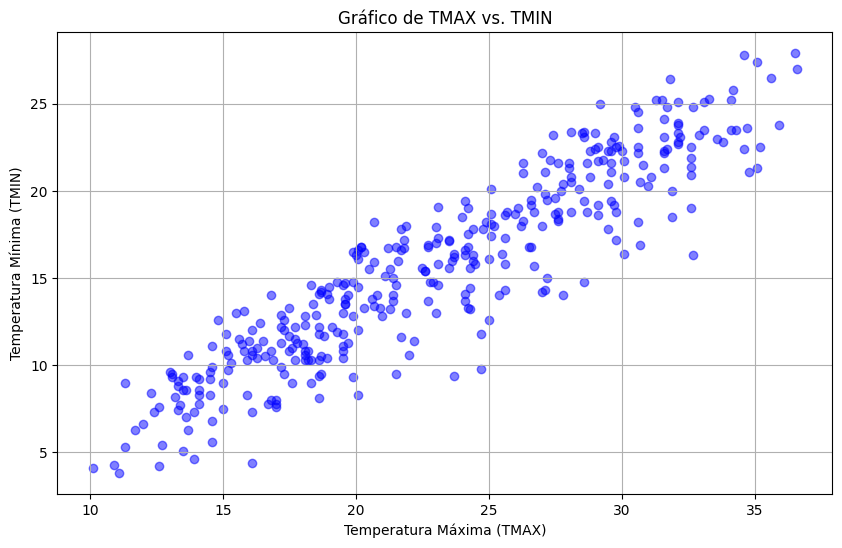

In [ ]:
# Seleccionar las características relevantes (TMAX y TMIN)
X = df2[['TMAX', 'TMIN']]

# Crear una nueva columna llamada 'TMAX_TMIN' que contenga la combinación de 'TMAX' y 'TMIN'
df2['TMAX_TMIN'] = df2['TMAX'].astype(str) + '-' + df2['TMIN'].astype(str)

# Verificar el DataFrame actualizado
print(df2)

# Graficar TMAX y TMIN
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura
plt.scatter(X['TMAX'], X['TMIN'], c='blue', alpha=0.5)  # Gráfico de dispersión
plt.xlabel('Temperatura Máxima (TMAX)')
plt.ylabel('Temperatura Mínima (TMIN)')
plt.title('Gráfico de TMAX vs. TMIN')
plt.grid(True)
plt.show()

In [ ]:

# 1. Generar la columna "PRECIO DEL KILO DE HELADO" basada en la temperatura
# Define el rango de precios del helado y el porcentaje de incremento
precio_inicial = 1000  # Precio inicial del kilo de helado
incremento_por_grado = 0.01  # Porcentaje de incremento por grado de temperatura
temperatura_actual = df2['TPROMEDIO']  # Usamos la temperatura promedio del DataFrame 'data'
precios_helado = precio_inicial + (temperatura_actual * incremento_por_grado)

# 2. Generar la columna "COMPRA HELADO" basada en la probabilidad
# Definir la probabilidad de no compra (por defecto, 70% de los casos)
probabilidad_no_compra = 0.8

# Crear una función que determine si se compra helado o no en función de la temperatura
def decide_compra_helado(fila):
    temperatura = fila['TMAX']
    if temperatura < 20:
        return 'NO' #np.random.choice(['SI', 'NO'], p=[1 - probabilidad_no_compra, probabilidad_no_compra])
    else:
        return 'SI'  # Si la temperatura no es mayor a 20 grados, se compra helado con certeza


# Agregar las nuevas columnas al DataFrame
df2['PRECIO DEL KILO DE HELADO'] = precios_helado
# Aplicar la función para generar la columna "COMPRA HELADO" condicionada
df2['COMPRA HELADO'] = df2.apply(decide_compra_helado, axis=1)

# Verificar el resultado
print(df2)

     TMAX  TMIN           NOMBRE  TPROMEDIO      Fecha  TMAX_TMIN  \
0    23.0  17.9  AEROPARQUE AERO      20.45 2023-01-03  23.0-17.9   
75   21.3  13.2  AEROPARQUE AERO      17.25 2023-01-05  21.3-13.2   
74   25.5  16.4  AEROPARQUE AERO      20.95 2023-01-06  25.5-16.4   
73   18.6  14.1  AEROPARQUE AERO      16.35 2023-01-07  18.6-14.1   
72   17.2  12.2  AEROPARQUE AERO      14.70 2023-01-08  17.2-12.2   
..    ...   ...              ...        ...        ...        ...   
358  23.1  15.8  AEROPARQUE AERO      19.45 2023-12-26  23.1-15.8   
362  19.9   9.3  AEROPARQUE AERO      14.60 2023-12-28   19.9-9.3   
364  22.2  11.4  AEROPARQUE AERO      16.80 2023-12-30  22.2-11.4   
363  17.0   7.8  AEROPARQUE AERO      12.40 2023-12-30   17.0-7.8   
361  24.7  11.8  AEROPARQUE AERO      18.25 2023-12-31  24.7-11.8   

     PRECIO DEL KILO DE HELADO COMPRA HELADO  
0                    1000.2045            SI  
75                   1000.1725            SI  
74                   1000.2095

In [ ]:
temperatura = df2['TPROMEDIO'].values  # Datos de temperatura
compra_helado = (df2['COMPRA HELADO'] == 'SI').astype(int).values  # Etiquetas: SI=1, NO=0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(temperatura, compra_helado, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(1,)),  # Capa de entrada
    tf.keras.layers.Dense(units=32, activation='relu'),  # Capa oculta
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Capa de salida (clasificación binaria)
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),verbose=0)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

3/3 [==============================] - 0s 5ms/step - loss: 0.1537 - accuracy: 0.9178
Precisión en el conjunto de prueba: 91.78%


In [ ]:
# Temperatura de prueba
temperatura_prueba = np.array([36.0])  # Reemplaza con la temperatura que quieras probar

# Realiza la predicción con el modelo
prediccion = model.predict(temperatura_prueba)
print(prediccion)
# La salida de 'prediccion' será un valor entre 0 y 1. Puedes establecer un umbral para decidir si comprar o no. Por ejemplo:
umbral = 0.5  # Umbral de decisión (puedes ajustarlo según tus necesidades)

if prediccion > umbral:
    decision = 'Comprar Helado'
else:
    decision = 'No Comprar Helado'

print(f'Para una temperatura de {temperatura_prueba[0]} grados, se decide: {decision}')

1/1 [==============================] - 0s 153ms/step
[[0.99999887]]
Para una temperatura de 36.0 grados, se decide: Comprar Helado
